Nikishit

In [1]:
import pandas as pd
import numpy as np 
import scienceplots
import matplotlib.pyplot as plt 
def science_plot(fontsize = 12):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

paw_file = 'foot_lengths.csv'
rotarod_hotplate_file = 'rotarod_hotplate.csv'

# sfi_stats loading
paw_data = pd.read_csv(paw_file)
rotarod_hotplate_data = pd.read_csv(rotarod_hotplate_file)

In [3]:
# SFI calculation function
def calculate_sfi(epl, npl, ets, nts, eit, nit):
    """
    Calculate the Sciatic Functional Index (SFI).

    Parameters:
    epl (float): Experimental paw length (heel to third toe) for the right paw.
    npl (float): Normal paw length for the left paw.
    ets (float): Experimental toe spread (distance between first and fifth toes) for the right paw.
    nts (float): Normal toe spread for the left paw.
    eit (float): Experimental inter-median toe spread (distance between second and fourth toes) for the right paw.
    nit (float): Normal inter-median toe spread for the left paw.

    Returns:
    float: The calculated SFI value.
    """
    sfi = (-38.3 * ((epl - npl) / npl) +
           109.5 * ((ets - nts) / nts) +
            13.3 * ((eit - nit) / nit) -
           8.839)
    
    return sfi

In [4]:
paw_data['SFI'] = paw_data.apply(
    lambda row: calculate_sfi(
        row['EPL'], row['NPL'], row['ETS'], row['NTS'], row['EIT'], row['NIT']
    ), axis=1
)

sfi_stats = paw_data.groupby('GENERAL CODE')['SFI'].agg(['mean','std']).reset_index()
sfi_stats.rename(columns={'mean': 'Average SFI', 'std': 'SFI Standard Deviation'}, inplace=True)

rotarod_data = rotarod_hotplate_data[['GENERAL CODE', 'R', 'T', 'D']]
hotplate_data = rotarod_hotplate_data[['GENERAL CODE', 'H']]
print(rotarod_data)
print(hotplate_data)

rotarod_stats_R = rotarod_data.groupby('GENERAL CODE')['R'].agg(['mean','std']).reset_index()
rotarod_stats_T = rotarod_data.groupby('GENERAL CODE')['T'].agg(['mean','std']).reset_index()
rotarod_stats_D = rotarod_data.groupby('GENERAL CODE')['D'].agg(['mean','std']).reset_index()
hotplate_stats  = hotplate_data.groupby('GENERAL CODE')['H'].agg(['mean','std']).reset_index()


    GENERAL CODE      R     T     D
0             CB  37.44  19.0  0.59
1             CB  36.99  18.0  0.56
2             CB  37.36  19.0  0.57
3             CB  33.94  17.0  0.47
4             CB  33.07  16.0  0.46
..           ...    ...   ...   ...
415          SW6    NaN   NaN   NaN
416          SW6    NaN   NaN   NaN
417          SW6    NaN   NaN   NaN
418          SW6    NaN   NaN   NaN
419          SW6    NaN   NaN   NaN

[420 rows x 4 columns]
    GENERAL CODE      H
0             CB  17.89
1             CB  17.62
2             CB  11.41
3             CB  16.00
4             CB  18.80
..           ...    ...
415          SW6    NaN
416          SW6    NaN
417          SW6    NaN
418          SW6    NaN
419          SW6    NaN

[420 rows x 2 columns]


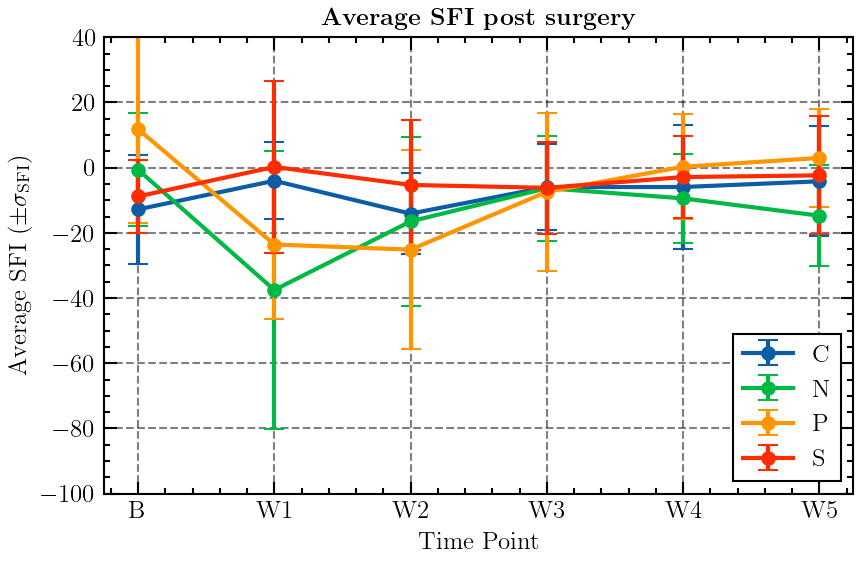

In [8]:


# Extract the letter code (Category) and time point (Week)
sfi_stats['Category'] = sfi_stats['GENERAL CODE'].str[0]  # Extract the first letter
sfi_stats['Week'] = sfi_stats['GENERAL CODE'].str[1:]    # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3' : 3, 'W4': 4, 'W5':5}
sfi_stats['Week_Order'] = sfi_stats['Week'].map(week_order)

# Sort by Category and Week_Order
sfi_stats.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Group by Category and Week for plotting
grouped = sfi_stats.groupby(['Category', 'Week']).agg(
    avg_sfi=('Average SFI', 'mean'),
    std_sfi=('SFI Standard Deviation', 'mean')
).reset_index()

# Plotting
plt.figure(figsize=(6,4), dpi = 150)

categories = grouped['Category'].unique()
weeks = ['B', 'W1', 'W2','W3','W4','W5']

for category in categories:
    subset = grouped[grouped['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['avg_sfi'], yerr=subset['std_sfi'], 
        label=f'{category}', fmt='-o', capsize=5
    )

# Customize the plot
plt.title(r'\textbf{Average SFI post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Average SFI ($\pm \sigma_\text{SFI}$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=weeks)   # Ensure x-axis is labeled B, W1, W2
plt.ylim(-100,40)
plt.grid(True)
plt.legend(fancybox=False, edgecolor = 'k')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean       std Category Week  Week_Order
0            CB  33.248000  4.191158        C    B         0.0
1           CW1  38.910667  2.941728        C   W1         1.0
2           CW2  39.630000  2.130141        C   W2         2.0
3           CW3  39.816667  1.192307        C   W3         3.0
4           CW4  40.180000  0.000000        C   W4         4.0
5           CW5  38.385333  4.047599        C   W5         5.0
6           CW6        NaN       NaN        C   W6         NaN
7            NB  34.212667  7.023154        N    B         0.0
8           NW1  33.854000  7.800993        N   W1         1.0
9           NW2  34.894667  6.052175        N   W2         2.0
10          NW3  36.739333  4.763514        N   W3         3.0
11          NW4  38.676667  4.154274        N   W4         4.0
12          NW5  39.598667  1.625093        N   W5         5.0
13          NW6        NaN       NaN        N   W6         NaN
14           PB  33.222667  6.636066        P    B     

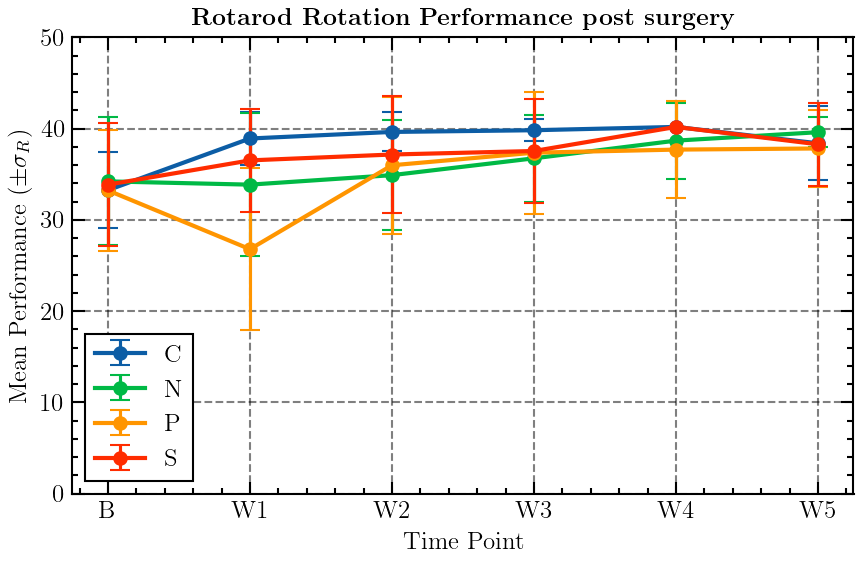

In [11]:
print(rotarod_stats_R)
# Extract the letter code (Category) and time point (Week)
rotarod_stats_R['Category'] = rotarod_stats_R['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_R['Week'] = rotarod_stats_R['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4':4, 'W5':5}
rotarod_stats_R['Week_Order'] = rotarod_stats_R['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_R.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi=150)

categories = rotarod_stats_R['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_R[rotarod_stats_R['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )

# Customize the plot
plt.title(r'\textbf{Rotarod Rotation Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance ($\pm \sigma_R$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,50)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'lower left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean         std Category Week  Week_Order
0            CB  16.466667    2.199567        C    B         0.0
1           CW1  20.533333    2.503331        C   W1         1.0
2           CW2  23.266667    2.491892        C   W2         2.0
3           CW3  24.266667    3.634491        C   W3         3.0
4           CW4  27.533333    4.673125        C   W4         4.0
5           CW5  32.000000   12.029725        C   W5         5.0
6           CW6        NaN         NaN        C   W6         NaN
7            NB  18.133333    4.778922        N    B         0.0
8           NW1  19.000000    6.469710        N   W1         1.0
9           NW2  24.000000   16.124515        N   W2         2.0
10          NW3  25.200000   13.523524        N   W3         3.0
11          NW4  26.466667   10.154989        N   W4         4.0
12          NW5  25.800000    5.671986        N   W5         5.0
13          NW6        NaN         NaN        N   W6         NaN
14           PB  17.06666

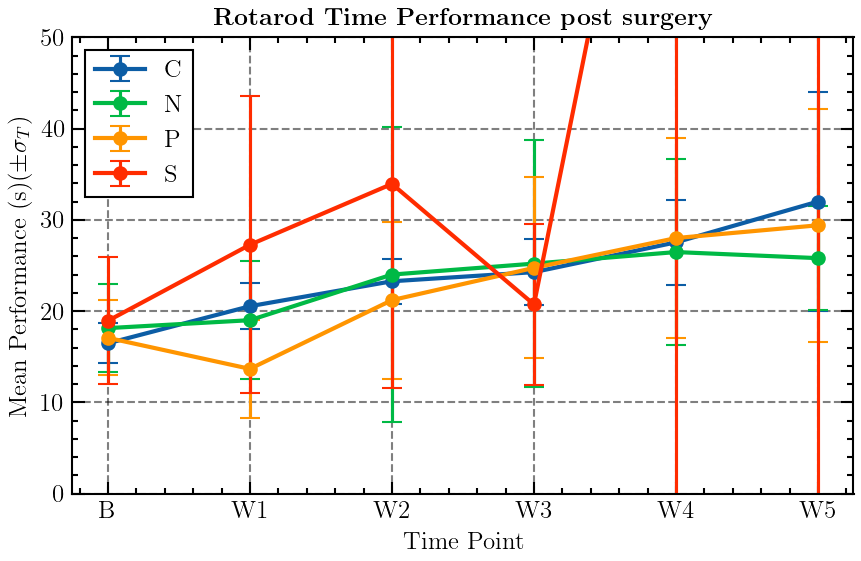

In [12]:
# Extract the letter code (Category) and time point (Week)
rotarod_stats_T['Category'] = rotarod_stats_T['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_T['Week'] = rotarod_stats_T['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4':4, 'W5':5}
rotarod_stats_T['Week_Order'] = rotarod_stats_T['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_T.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi=150)

categories = rotarod_stats_T['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_T[rotarod_stats_T['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(rotarod_stats_T)
# Customize the plot
plt.title(r'\textbf{Rotarod Time Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance (s)($\pm \sigma_T$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,50)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE      mean       std Category Week  Week_Order
0            CB  0.462667  0.107469        C    B         0.0
1           CW1  0.740000  0.187579        C   W1         1.0
2           CW2  0.879333  0.157592        C   W2         2.0
3           CW3  0.941333  0.243424        C   W3         3.0
4           CW4  1.156667  0.308445        C   W4         4.0
5           CW5  1.450667  0.775863        C   W5         5.0
6           CW6       NaN       NaN        C   W6         NaN
7            NB  0.576000  0.274013        N    B         0.0
8           NW1  0.637333  0.367996        N   W1         1.0
9           NW2  0.941333  1.025802        N   W2         2.0
10          NW3  1.006667  0.866138        N   W3         3.0
11          NW4  1.100000  0.655112        N   W4         4.0
12          NW5  1.043333  0.372878        N   W5         5.0
13          NW6       NaN       NaN        N   W6         NaN
14           PB  0.506667  0.219111        P    B         0.0
15      

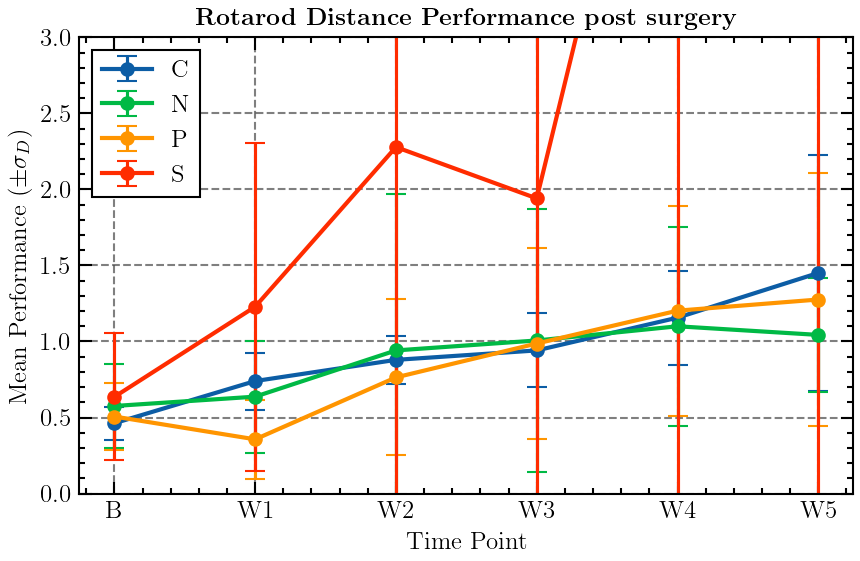

In [14]:
# Extract the letter code (Category) and time point (Week)
rotarod_stats_D['Category'] = rotarod_stats_D['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_D['Week'] = rotarod_stats_D['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4': 4, 'W5':5}
rotarod_stats_D['Week_Order'] = rotarod_stats_D['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_D.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi = 150)

categories = rotarod_stats_D['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_D[rotarod_stats_D['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(rotarod_stats_D)
# Customize the plot
plt.title(r'\textbf{Rotarod Distance Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance ($\pm \sigma_D$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,3)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean       std Category Week  Week_Order
0            CB  13.388000  3.319183        C    B         0.0
1           CW1  10.815333  4.429916        C   W1         1.0
2           CW2  12.362667  2.166394        C   W2         2.0
3           CW3  11.424000  2.241434        C   W3         3.0
4           CW4  11.042000  1.035596        C   W4         4.0
5           CW5  10.858000  0.979608        C   W5         5.0
6           CW6        NaN       NaN        C   W6         NaN
7            NB  14.238667  6.259143        N    B         0.0
8           NW1  15.371333  5.425242        N   W1         1.0
9           NW2  18.324000  4.298406        N   W2         2.0
10          NW3  15.565333  4.877329        N   W3         3.0
11          NW4  13.255333  0.974840        N   W4         4.0
12          NW5  14.584000  2.491525        N   W5         5.0
13          NW6        NaN       NaN        N   W6         NaN
14           PB  16.608667  7.708178        P    B     

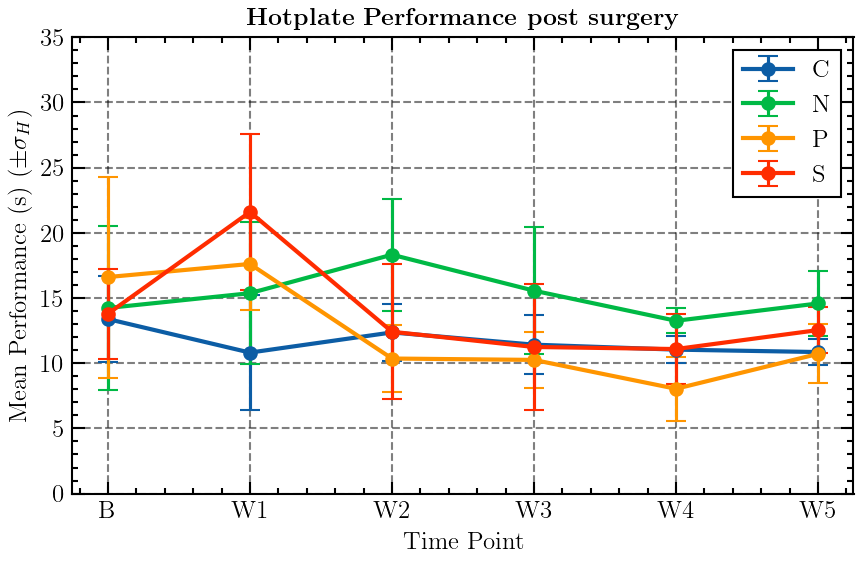

In [17]:
# Extract the letter code (Category) and time point (Week)
hotplate_stats['Category'] = hotplate_stats['GENERAL CODE'].str[0]  # Extract the first letter
hotplate_stats['Week'] = hotplate_stats['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4': 4, 'W5':5}
hotplate_stats['Week_Order'] = hotplate_stats['Week'].map(week_order)

# Sort by Category and Week_Order
hotplate_stats.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi = 150)

categories = hotplate_stats['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5']  # Predefined week labels

for category in categories:
    subset = hotplate_stats[hotplate_stats['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(hotplate_stats)
# Customize the plot
plt.title(r'\textbf{Hotplate Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance (s) ($\pm \sigma_H$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,35)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper right')
plt.tight_layout()

# Show the plot
plt.show()